In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import datetime as dt
from datetime import datetime as dtdt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set()

In [2]:
path = "/Users/iomacbookair2/Documents/lab/DEIM2023/tweet_csv/221215_junk_thu.csv"
df = pd.read_csv((path))
df.sort_values(by = 'created_at', ascending = True, inplace = True)
df = df.reset_index(drop=True)
df['created_at'] = pd.to_datetime(df['created_at'])
df


,created_at,text,author_id,username
0,2022-12-16 01:00:00,#meganebiiki,1386334382596657155,curvenohiketsu
1,2022-12-16 01:00:00,#meganebiiki,727892583771344897,g_atsuhiko
2,2022-12-16 01:00:00,#meganebiiki,1280116851544977408,mazuikabegami
3,2022-12-16 01:00:00,#meganebiiki,901338862609289216,Phimosis44
4,2022-12-16 01:00:00,#meganebiiki,1501945949152710656,radiowokikuyo
...,...,...,...,...
596,2022-12-16 03:00:28,お疲れ様でした #meganebiiki,2385474030,agogggo
597,2022-12-16 03:00:57,今夜は嬉しい夜になりました！！ 来週はハピホリ🤗🎄✨ 皆さまお疲れさまでした☆彡 #mega...,1283206838884855808,Anemoneiuy
598,2022-12-16 03:01:22,JINRIKI STATIONの益々のご活躍を祈って、みなさんありがとうございました〜！ #...,965974369343164421,moushachou
599,2022-12-16 03:02:28,ハピホリな時間をありがとうございました♪ おつかれさまでした～ #meganebiiki,1431336997,Niagirl_45


In [3]:
c_df = df.set_index('created_at').resample('T').count()
cnt = pd.DataFrame(
    {'created_at' : c_df.index.strftime('%Y-%m-%d %H:%M:%S'), 'counts' : c_df['text'].values})
cnt

,created_at,counts
0,2022-12-16 01:00:00,100
1,2022-12-16 01:01:00,19
2,2022-12-16 01:02:00,11
3,2022-12-16 01:03:00,9
4,2022-12-16 01:04:00,3
...,...,...
118,2022-12-16 02:58:00,12
119,2022-12-16 02:59:00,32
120,2022-12-16 03:00:00,6
121,2022-12-16 03:01:00,1


In [4]:
filename =  "count_221215_junk_thu.csv"
cnt.to_csv(filename, encoding = 'utf-8-sig')

In [5]:
max(cnt['counts']), min(cnt['counts'])

(100, 0)

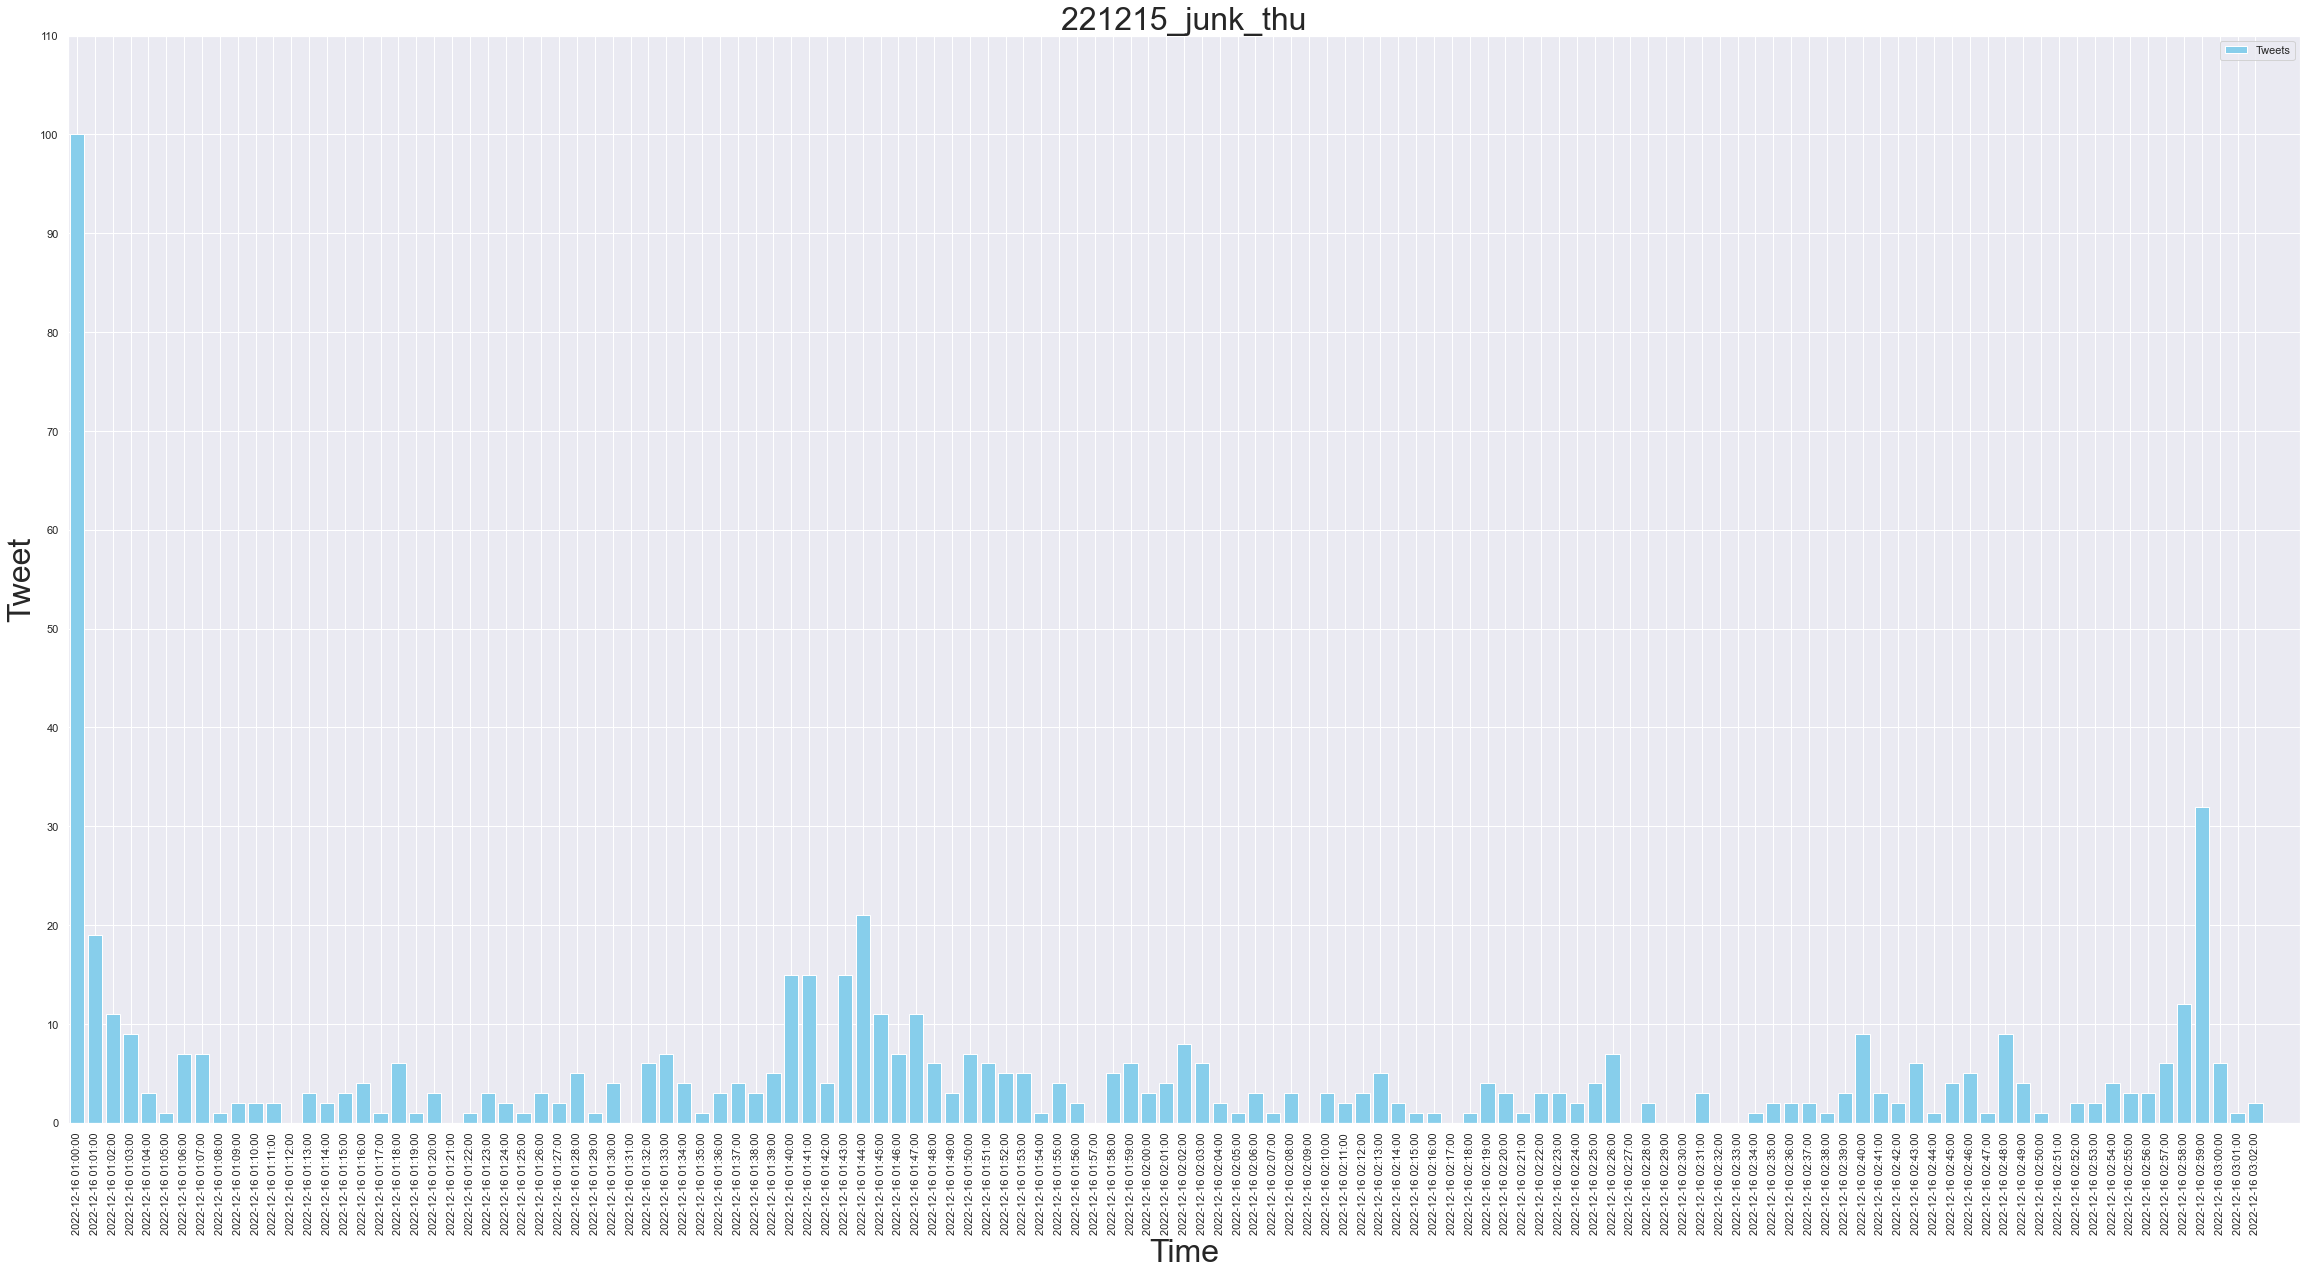

In [6]:
time = cnt['created_at']
tweets = cnt['counts']
fig = plt.figure(1, figsize=(40,20)) # 描画領域作成

c1,c2 = "skyblue", "black"
l1,l2 = "Tweets","Score"
axes = fig.add_subplot(111) # Axes作成
axes.set_xlabel("Time", fontsize = 32)
axes.set_ylabel("Tweet", fontsize = 32)
axes.bar(time, tweets, color=c1, label=l1)# 描画
axes.set_title("221215_junk_thu", fontsize = 32) # タイトル

# x軸
axes.tick_params(axis='x', rotation=90) # 軸目盛ラベルの回転
axes.set_xlim(-0.5, 124.5) # グラフの横幅と全体の端を揃える

# y軸
axes.set_ylim(0, 110) # y軸の範囲を指定する
start = 0
end = 111
stepsize = 10
axes.yaxis.set_ticks(np.arange(start, end, stepsize)) # y軸の間隔を指定する

axes.legend(loc=1)
# plt.savefig("thetrad220124.")